In [1253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

In [2018]:
df = pd.read_csv('updated_diamonds.csv')

## EDA

In [2019]:
df.drop('Unnamed: 0',axis =1, inplace=True) #removing column that was basically the same as the index
df.drop_duplicates(inplace = True) #might be some duplicate rows based on the way the data was scraped (changing floor price)

In [2020]:
df.shape

(52461, 14)

In [2021]:
df.info() #data types are as expected

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52461 entries, 0 to 52885
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   shape             52461 non-null  object 
 1   original_price    52461 non-null  int64  
 2   discounted_price  6796 non-null   float64
 3   carat             52461 non-null  float64
 4   cut               52461 non-null  object 
 5   color             52461 non-null  object 
 6   clarity           52461 non-null  object 
 7   polish            52461 non-null  object 
 8   symmetry          52461 non-null  object 
 9   fluorescence      52461 non-null  object 
 10  depth             52461 non-null  float64
 11  table             52461 non-null  float64
 12  lxwratio          52461 non-null  float64
 13  culet             52461 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 6.0+ MB


In [2022]:
#Astor Ideal and showing up as ealAstor - need to update
df['cut'] = df['cut'].replace('ealAstor','Astor Ideal')

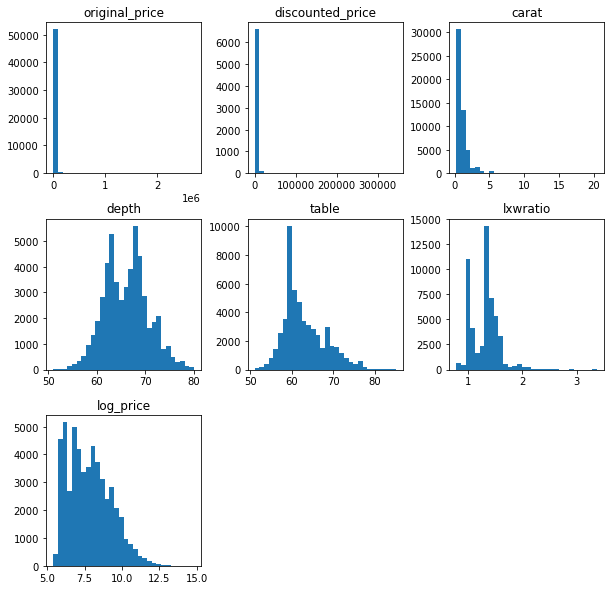

In [2023]:
df['log_price'] = np.log(df['original_price'])
df.hist(figsize=(10,10),bins=30,grid=False);

Text(0, 0.5, 'Frequency')

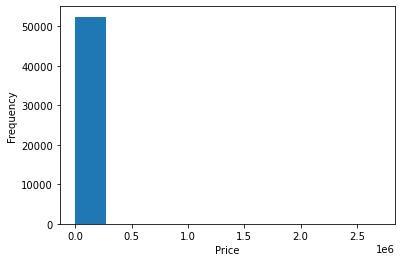

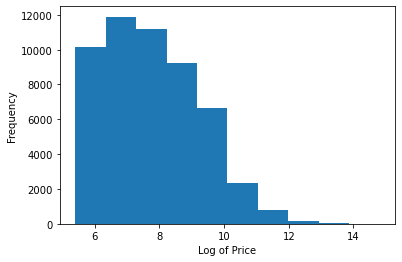

In [1982]:
fig, ax = plt.subplots()
ax.hist(df['original_price'])
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

fig, ax = plt.subplots()
ax.hist(df['log_price'])
ax.set_xlabel('Log of Price')
ax.set_ylabel('Frequency')





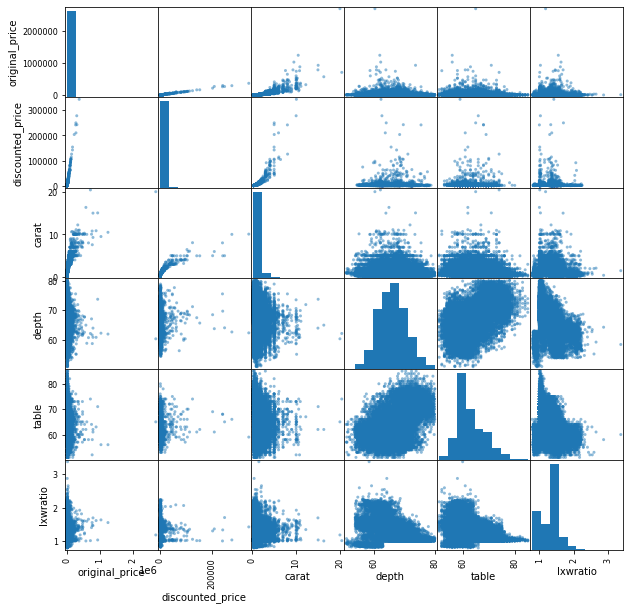

In [1974]:
pd.plotting.scatter_matrix(df,figsize=(10,10));

In [1890]:
df.describe()

,original_price,discounted_price,carat,depth,table,lxwratio,log_price
count,5.246100e+04,6796.000000,52461.000000,52461.000000,52461.000000,52461.000000,52461.000000
mean,7.941095e+03,2758.761919,0.993874,66.088462,62.946719,1.308527,7.806021
std,2.688281e+04,11111.163456,0.909858,4.517800,5.039816,0.236147,1.411813
min,2.210000e+02,238.000000,0.230000,51.000000,51.000000,0.790000,5.398163
25%,7.930000e+02,453.000000,0.400000,62.700000,59.000000,1.050000,6.675823
50%,2.152000e+03,851.000000,0.710000,66.200000,62.000000,1.350000,7.674153
75%,6.409000e+03,1817.000000,1.200000,68.900000,66.000000,1.440000,8.765459
max,2.702260e+06,343853.000000,20.450000,80.000000,85.000000,3.370000,14.809599


In [1891]:
df.corr()

,original_price,discounted_price,carat,depth,table,lxwratio,log_price
original_price,1.000000,0.996543,0.750451,-0.001705,0.009492,-0.022267,0.510031
discounted_price,0.996543,1.000000,0.821921,0.021983,0.024054,-0.041886,0.541841
carat,0.750451,0.821921,1.000000,0.050836,0.015941,-0.111207,0.867236
depth,-0.001705,0.021983,0.050836,1.000000,0.592803,-0.555673,0.030710
table,0.009492,0.024054,0.015941,0.592803,1.000000,-0.446653,-0.035061
lxwratio,-0.022267,-0.041886,-0.111207,-0.555673,-0.446653,1.000000,-0.124706
log_price,0.510031,0.541841,0.867236,0.030710,-0.035061,-0.124706,1.000000


Ordinal Encoding - check correlation


In [1961]:
#ascending order
cut_ord = ['Good', 'Very Good', 'Astor Ideal']
clarity_ord = ['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL']
color_ord = ['K', 'J', 'I', 'H', 'G', 'F', 'E', 'D']
polish_ord = ['Good','Very Good','Excellent']
symmetry_ord = ['Good','Very Good','Excellent']

def cat_mapper(categories):
    i = 0
    mapped = {}
    for cat in categories:
        mapped[cat] = i
        i+=1
    return mapped

In [1967]:
cut_ord = cat_mapper(cut_ord)
clarity_ord = cat_mapper(clarity_ord)
color_ord = cat_mapper(color_ord)
polish_ord = cat_mapper(polish_ord)
symmetry_ord = cat_mapper(symmetry_ord)

In [1968]:
df_ord = df_filtered.copy()
df_ord['cut'].replace(cut_ord,inplace=True)
df_ord['clarity'].replace(clarity_ord,inplace=True)
df_ord['color'].replace(color_ord,inplace=True)
df_ord['polish'].replace(polish_ord,inplace=True)
df_ord['symmetry'].replace(symmetry_ord,inplace=True)
df_ord

,shape,original_price,carat,cut,color,clarity,polish,symmetry,fluorescence,depth,table,lxwratio,culet,log_price
0,Emerald,221,0.30,0,1,2,1,0,None,70.0,61.0,1.33,None,5.398163
1,Emerald,224,0.30,1,1,1,2,1,Faint,65.9,66.0,1.42,None,5.411646
2,Emerald,224,0.30,1,1,1,2,1,Faint,66.6,66.0,1.28,None,5.411646
3,Pear,225,0.30,1,1,1,1,1,Faint,61.7,62.0,1.60,None,5.416100
4,Pear,226,0.30,1,1,0,1,1,None,62.5,59.0,1.57,None,5.420535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52861,Emerald,439952,7.25,1,7,3,2,1,None,64.4,65.0,1.43,None,12.994421
52863,Oval,464826,8.02,1,6,3,2,1,None,62.2,57.0,1.38,None,13.049418
52865,Emerald,469643,8.30,1,6,3,2,2,None,68.1,69.0,1.60,None,13.059728
52866,Emerald,469665,7.00,1,7,7,2,1,None,66.7,68.0,1.34,None,13.059775


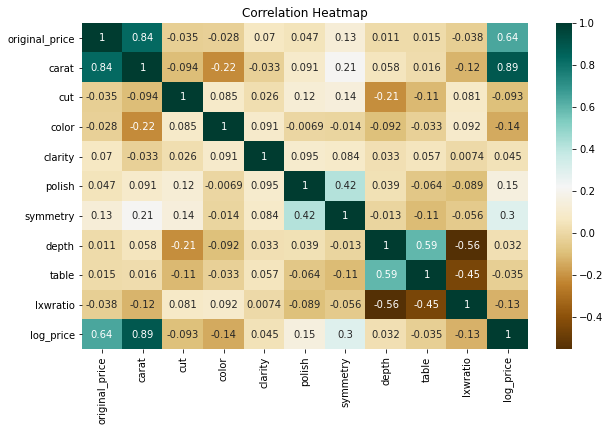

In [1970]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df_ord.corr(),cmap = 'BrBG',annot = True)
heatmap.set_title('Correlation Heatmap');

need to remove discounted price since we are trying to predict original price or else there might be data leakage - model will have the information you are trying to predict

In [2024]:
df.drop('discounted_price',axis =1,inplace = True)

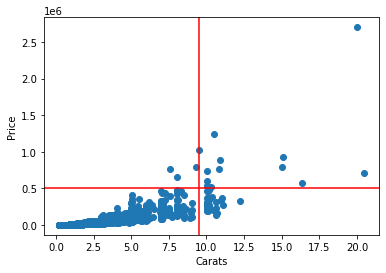

In [1729]:
#there are outliers - one diamond is almost 3 million!
fig,ax = plt.subplots()
ax.scatter(df.carat,(df.original_price))
ax.set_xlabel('Carats')
ax.set_ylabel('Price')
plt.axvline(x=9.5, color = 'r')
plt.axhline(500000, color = 'r');

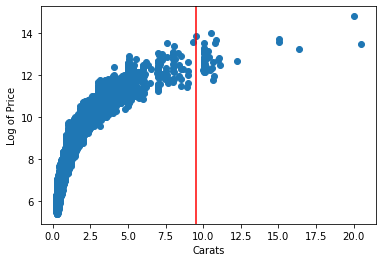

In [1310]:
fig,ax = plt.subplots()
ax.scatter(df.carat,np.log(df.original_price))
ax.set_xlabel('Carats')
ax.set_ylabel('Log of Price')
plt.axvline(x=9.5, color = 'r');

Any specific patterns that jump out with respect to price? Diamond Price vs. 2 Predictors

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


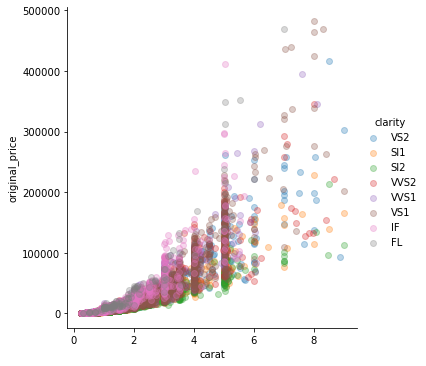

In [1703]:
sns.lmplot('carat','original_price', data=df_filtered,hue='clarity', fit_reg =False, scatter_kws = {'alpha': .3})

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


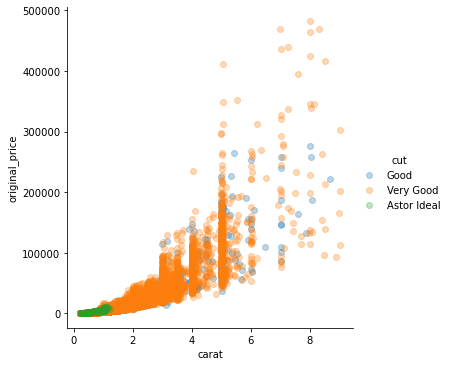

In [1702]:
sns.lmplot('carat','original_price', data=df_filtered,hue='cut', fit_reg =False, scatter_kws = {'alpha': 0.3})

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


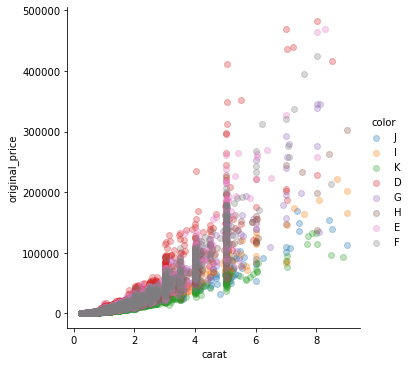

In [1701]:
sns.lmplot('carat','original_price', data=df_filtered,hue='color', fit_reg =False, scatter_kws = {'alpha': 0.3})

In [1327]:
print(f'Percent of data to drop: {df[(df.carat>9.5) & (df.original_price>600000)].shape[0]/df.shape[0]*100}%')

Percent of data to drop: 0.017155601303825697%


In [2025]:
df_filtered = df[(df.carat<9.5) & (df.original_price<500000)]
df_filtered

,shape,original_price,carat,cut,color,clarity,polish,symmetry,fluorescence,depth,table,lxwratio,culet,log_price
0,Emerald,221,0.30,Good,J,VS2,Very Good,Good,None,70.0,61.0,1.33,None,5.398163
1,Emerald,224,0.30,Very Good,J,SI1,Excellent,Very Good,Faint,65.9,66.0,1.42,None,5.411646
2,Emerald,224,0.30,Very Good,J,SI1,Excellent,Very Good,Faint,66.6,66.0,1.28,None,5.411646
3,Pear,225,0.30,Very Good,J,SI1,Very Good,Very Good,Faint,61.7,62.0,1.60,None,5.416100
4,Pear,226,0.30,Very Good,J,SI2,Very Good,Very Good,None,62.5,59.0,1.57,None,5.420535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52861,Emerald,439952,7.25,Very Good,D,VS1,Excellent,Very Good,None,64.4,65.0,1.43,None,12.994421
52863,Oval,464826,8.02,Very Good,E,VS1,Excellent,Very Good,None,62.2,57.0,1.38,None,13.049418
52865,Emerald,469643,8.30,Very Good,E,VS1,Excellent,Excellent,None,68.1,69.0,1.60,None,13.059728
52866,Emerald,469665,7.00,Very Good,D,FL,Excellent,Very Good,None,66.7,68.0,1.34,None,13.059775


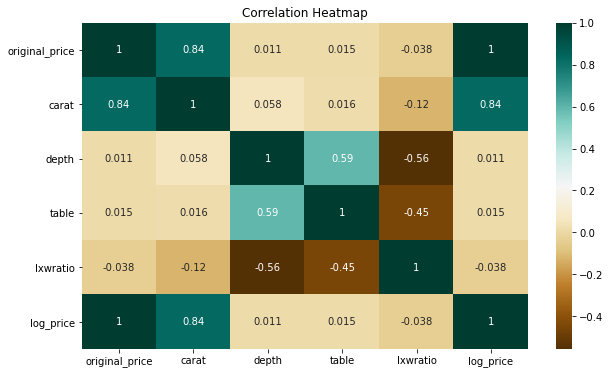

In [1207]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df_filtered.corr(),cmap = 'BrBG',annot = True)
heatmap.set_title('Correlation Heatmap');

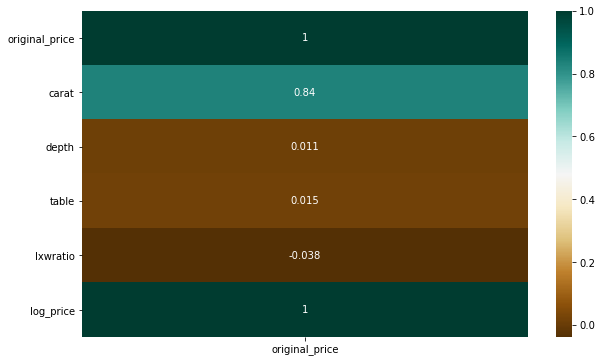

In [1209]:
plt.figure(figsize = (10,6))
sns.heatmap(df_filtered.corr()[['original_price']],cmap = 'BrBG',annot=True);

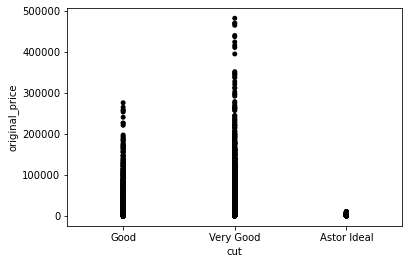

In [1213]:
sns.stripplot(data = df_filtered,
              x='cut', y='original_price', 
              order = ['Good','Very Good','Astor Ideal'],
              color = 'black', jitter=False);

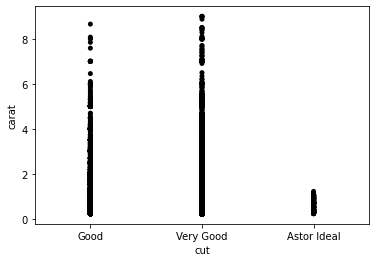

In [1214]:
sns.stripplot(data = df_filtered,
              x='cut', y='carat', 
              order = ['Good','Very Good','Astor Ideal'],
              color = 'black', jitter=False);

In [1215]:
len(df_filtered[df_filtered.cut == 'Astor Ideal']['cut'])/df.shape[0] #less than one percent of diamonds are astor ideal

0.009759630963954175

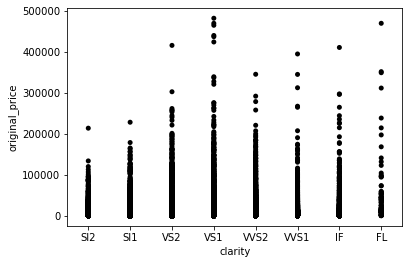

In [1216]:
sns.stripplot(data = df_filtered,
              x='clarity', y='original_price', 
              order = ['SI2','SI1','VS2','VS1','VVS2','VVS1','IF','FL'],
              color = 'black', jitter=False);

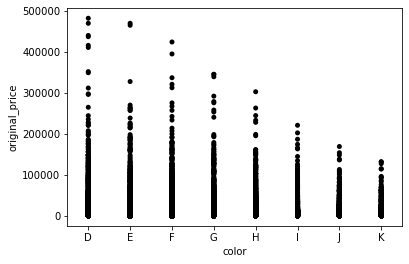

In [1225]:
sns.stripplot(data = df_filtered,
              x='color', y='original_price', 
              order = ['D', 'E','F','G','H','I','J','K'],
              color = 'black', jitter=False);

## Linear Regression Model

## Predicting log of price
Price has a huge range (~200 - ~3mil) and right skewed - taking the log should help

In [2029]:
linreg = LinearRegression()

X = df.drop(['original_price','log_price'],axis = 1)
y = df.log_price
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [2030]:
X_train_1 = pd.get_dummies(X_train)
X_test_1 = pd.get_dummies(X_test)
y_predicted_1 = linreg.fit(X_train_1,y_train).predict(X_test_1)



print(f'Train RMSE: {(-cross_val_score(linreg,X_train_1,y_train,scoring="neg_root_mean_squared_error")).mean()}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_predicted_1))}')
print(f'Train R2: {cross_val_score(linreg,X_train_1,y_train,scoring="r2").mean()}')
print(f'Test R2: {r2_score(y_test,y_predicted_1)}')
print(f'Mean Absolute Percentage Error: {np.exp(mean_absolute_percentage_error(y_test,y_predicted_1))}')

Train RMSE: 0.6257190948968092
Test RMSE: 0.6641919686851367
Train R2: 0.8025155911746367
Test R2: 0.7819212423794508
Mean Absolute Percentage Error: 1.064329307241279


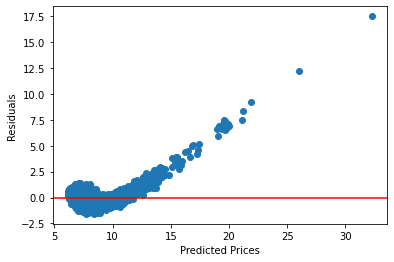

In [2031]:
predicted = linreg.fit(X_train_1,y_train).predict(X_test_1)
residuals = predicted - y_test

fig,ax = plt.subplots()
ax.scatter(predicted ,residuals)
plt.axhline(y=0, color = 'r')
ax.set_xlabel('Predicted Prices')
ax.set_ylabel('Residuals');

In [2032]:
np.exp(predicted).max()

105707819483966.0

Text(0, 0.5, 'percent error')

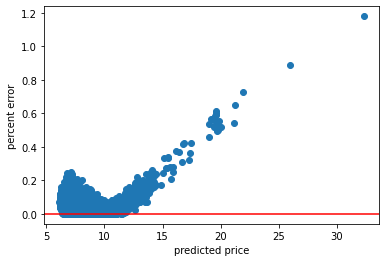

In [2033]:
percent_error = np.abs(y_test - predicted)/y_test
fig,ax = plt.subplots()
ax.scatter(predicted,percent_error)
ax.set_xlabel('predicted price')
plt.axhline(y=0, color = 'r')
ax.set_ylabel('percent error')

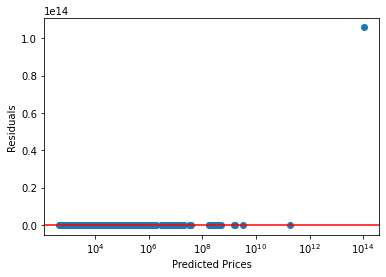

In [2034]:
predicted = linreg.fit(X_train_1,y_train).predict(X_test_1)
residuals = np.exp(predicted) - np.exp(y_test)

fig,ax = plt.subplots()
ax.scatter(np.exp(predicted),residuals)
plt.axhline(y=0, color = 'r')
plt.xscale('log')
ax.set_xlabel('Predicted Prices')
ax.set_ylabel('Residuals');

## Predicting log of price with outliers removed

In [2159]:
linreg = LinearRegression()

X = df_filtered.drop(['original_price','log_price'],axis = 1)
y = df_filtered.log_price
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [2160]:
X_train_1 = pd.get_dummies(X_train)
X_test_1 = pd.get_dummies(X_test)
y_predicted_1 = linreg.fit(X_train_1,y_train).predict(X_test_1)



print(f'Train RMSE: {(-cross_val_score(linreg,X_train_1,y_train,scoring="neg_root_mean_squared_error")).mean()}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_predicted_1))}')
print(f'Train R2: {cross_val_score(linreg,X_train_1,y_train,scoring="r2").mean()}')
print(f'Test R2: {r2_score(y_test,y_predicted_1)}')
print(f'Mean Absolute Percentage Error: {np.exp(mean_absolute_percentage_error(y_test,y_predicted_1))}')

Train RMSE: 0.5799218348104251
Test RMSE: 0.5592669277006687
Train R2: 0.8290707921889297
Test R2: 0.8411091599076508
Mean Absolute Percentage Error: 1.0600136361521626


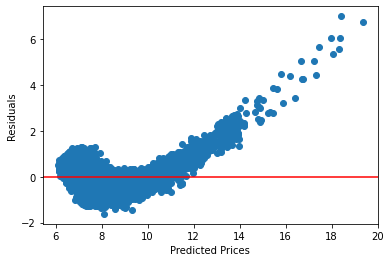

In [2148]:
predicted = linreg.fit(X_train_1,y_train).predict(X_test_1)
residuals = predicted - y_test

fig,ax = plt.subplots()
ax.scatter(predicted,residuals)
plt.axhline(y=0, color = 'r')
ax.set_xlabel('Predicted Prices')
ax.set_ylabel('Residuals');

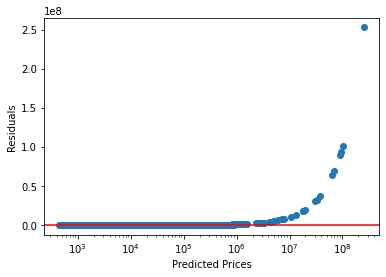

In [2149]:
predicted = linreg.fit(X_train_1,y_train).predict(X_test_1)
residuals = np.exp(predicted) - np.exp(y_test)

fig,ax = plt.subplots()
ax.scatter(np.exp(predicted),residuals)
plt.axhline(y=0, color = 'r')
plt.xscale('log')
ax.set_xlabel('Predicted Prices')
ax.set_ylabel('Residuals');

In [2155]:
#random forest log removing outliers
rf= RandomForestRegressor(n_jobs=-1).fit(X_train_1,y_train)
print(f'Train RMSE: {-cross_val_score(rf,X_train_1,y_train,scoring="neg_root_mean_squared_error").mean()}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test,rf.predict(X_test_1)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(np.exp(y_test),rf.predict(np.exp(X_test_1))))}')
print(f'Train R2: {cross_val_score(rf,X_train_1,y_train,scoring="r2").mean()}')
print(f'Test R2: {r2_score(y_test,rf.predict(X_test_1))}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test,rf.fit(X_train_1,y_train).predict(X_test_1))}')

Train RMSE: 0.10852279825950692
Test RMSE: 0.10478869342304616
Test RMSE: 20344.822458807947
Train R2: 0.9939625593240942
Test R2: 0.9945204251967679
Mean Absolute Percentage Error: 0.009777263909869287


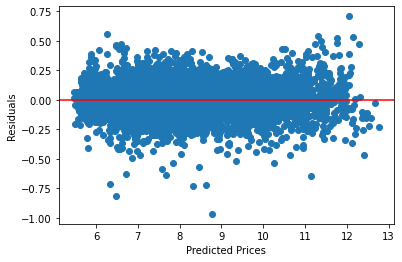

In [2156]:
predicted = rf.fit(X_train_1,y_train).predict(X_test_1)
residuals = predicted - y_test

fig,ax = plt.subplots()
ax.scatter(predicted,residuals)
plt.axhline(y=0, color = 'r')
ax.set_xlabel('Predicted Prices')
ax.set_ylabel('Residuals');

In [2158]:
#random forest log removing outliers
rf= RandomForestRegressor(n_jobs=-1,max_depth=100).fit(X_train_1,y_train)
print(f'Train RMSE: {-cross_val_score(rf,X_train_1,y_train,scoring="neg_root_mean_squared_error").mean()}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test,rf.predict(X_test_1)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(np.exp(y_test),rf.predict(np.exp(X_test_1))))}')
print(f'Train R2: {cross_val_score(rf,X_train_1,y_train,scoring="r2").mean()}')
print(f'Test R2: {r2_score(y_test,rf.predict(X_test_1))}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test,rf.fit(X_train_1,y_train).predict(X_test_1))}')

Train RMSE: 0.10864685102232756
Test RMSE: 0.10484127655315678
Test RMSE: 20344.81316074807


KeyboardInterrupt: 

### Predicting price - removing outliers

In [2161]:
linreg = LinearRegression()

X = df_filtered.drop(['original_price','log_price'],axis = 1)
y = df_filtered.original_price
X_train, X_test, y_train, y_test = train_test_split(X,y)

Try using all features

In [2162]:
X_train_1 = pd.get_dummies(X_train)
X_test_1 = pd.get_dummies(X_test)
y_predicted_1 = linreg.fit(X_train_1,y_train).predict(X_test_1)
print(f'Train RMSE: {-cross_val_score(linreg,X_train_1,y_train,scoring="neg_root_mean_squared_error").mean()}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test,y_predicted_1))}')
print(f'Train R2: {cross_val_score(linreg,X_train_1,y_train,scoring="r2").mean()}')
print(f'Test R2: {linreg.score(X_test_1,y_test)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test,y_predicted_1)}')

Train RMSE: 9179.000111711293
Test RMSE: 9525.116979991653
Train R2: 0.7525946621334109
Test R2: 0.7515428883961798
Mean Absolute Percentage Error: 3.099960864119794


In [2163]:
scaler = StandardScaler()
scaler.fit(X_train_1)
X_train_s = scaler.transform(X_train_1)
linreg.fit(X_train_1,y_train)

np.abs(linreg.coef_)

array([20043.04736507,   154.75236435,   118.80680429,  2426.95308997,
        1287.81954296,  2002.46555716,  1987.17462319,   207.84542363,
         166.38715026,   552.82073697,   235.3205715 ,  3651.16181646,
        2072.00944743,  3247.65957193,  2151.57377248,  1096.08579945,
        4092.50463489,  3790.73958595,  3002.98203429,  1337.20944079,
         206.17851555,  1767.47081518,  3779.10440519,  6883.03899109,
       16634.08840887,   101.64495082,  3490.95244556,  6188.3144474 ,
        1548.99632185,  2768.64148739,  1130.06513594,  1608.76352156,
         410.69745982,    39.09285489,   449.79031471,  1612.29266632,
         967.73458164,   644.55808468,  2248.26834445,  1366.25262595,
         980.62617143,   602.33993046,    36.71173999,  2689.30777563,
         784.70425011,   879.58908488,  1202.16286665,  3852.37052535,
         384.29303684,  2098.2393268 ,   577.60889763,  2795.71632448,
        2704.36257487,  1648.76760678,  1559.75610497])

Look at coefficients to see if there is some insight from feature importance

In [2164]:
coefficients = pd.concat([pd.DataFrame(X_train_1.columns, columns = ['features']),pd.DataFrame(np.transpose(np.abs(linreg.coef_)),columns = ['coefs'])], axis = 1)
coefficients.sort_values(by=['coefs'],ascending=False)

,features,coefs
0,carat,20043.047365
24,clarity_FL,16634.088409
23,color_K,6883.038991
27,clarity_SI2,6188.314447
16,color_D,4092.504635
47,fluorescence_Very Strong Blue,3852.370525
17,color_E,3790.739586
22,color_J,3779.104405
11,shape_Princess,3651.161816
26,clarity_SI1,3490.952446


In [2050]:
X_train_2 = X_train[['carat','cut','clarity', 'color']]
X_train_2 = pd.get_dummies(X_train_2)
X_test_2 = X_test[['carat','cut','clarity', 'color']]
X_test_2 = pd.get_dummies(X_test_2)
y_predicted_2 = linreg.fit(X_train_2,y_train).predict(X_test_2)
print(f'Train RMSE: {-cross_val_score(linreg,X_train_2,y_train,scoring="neg_root_mean_squared_error").mean()}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test,y_predicted_2))}')
print(f'Train R2: {cross_val_score(linreg,X_train_2,y_train,scoring="r2").mean()}')
print(f'Train R2: {r2_score(y_test,y_predicted_2)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test,y_predicted_2)}')

Train RMSE: 9291.988034919133
Test RMSE: 10391.554641716286
Train R2: 0.7402546016742554
Train R2: 0.7193565358109493
Mean Absolute Percentage Error: 3.527645090450622


In [2051]:
X_train_3 = X_train[['carat']]
X_train_3 = pd.get_dummies(X_train_3)
X_test_3 = X_test[['carat']]
X_test_3 = pd.get_dummies(X_test_3)
y_predicted_3 = linreg.fit(X_train_3,y_train).predict(X_test_3)
print(f'Train RMSE: {-cross_val_score(linreg,X_train_3,y_train,scoring="neg_root_mean_squared_error").mean()}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test,y_predicted_3))}')
print(f'Train R2: {cross_val_score(linreg,X_train_3,y_train,scoring="r2").mean()}')
print(f'Train R2: {r2_score(y_test,y_predicted_3)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test,y_predicted_3)}')

Train RMSE: 9936.900959074253
Test RMSE: 10997.769930058745
Train R2: 0.7027357449150637
Train R2: 0.6856574719315061
Mean Absolute Percentage Error: 3.674054237030962


The plot below (cone shaped) exhibits “heteroscedasticity,” meaning that the residuals get larger as the prediction moves from small to large (or from large to small). Occurs more often in datasets that have large range between largest and smallest observed values.

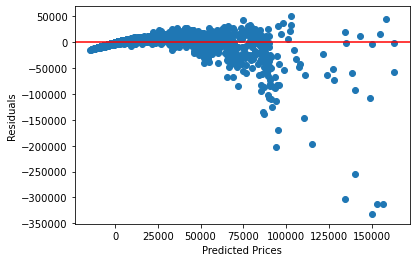

In [2052]:
predicted = linreg.fit(X_train_1,y_train).predict(X_test_1)
residuals = predicted - y_test

fig,ax = plt.subplots()
ax.scatter(predicted,residuals)
plt.axhline(y=0, color = 'r')
ax.set_xlabel('Predicted Prices')
ax.set_ylabel('Residuals');

In [2060]:
X_train_c = pd.DataFrame(X_train['carat'])
X_test_c = pd.DataFrame(X_test['carat'])
y_predicted_c = linreg.fit(X_train_c,y_train).predict(X_test_c)
print(f'Train RMSE: {-cross_val_score(linreg,X_train_c,y_train,scoring="neg_root_mean_squared_error").mean()}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test,y_predicted_c))}')
print(f'Train R2: {cross_val_score(linreg,X_train_c,y_train,scoring="r2").mean()}')
print(f'Test R2: {linreg.score(X_test_c,y_test)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test,y_predicted_c)}')

Train RMSE: 9936.900959074253
Test RMSE: 10997.769930058745
Train R2: 0.7027357449150637
Test R2: 0.6856574719315061
Mean Absolute Percentage Error: 3.674054237030962


## Random Forest

In [2165]:
#using all features
rf= RandomForestRegressor(n_jobs=-1).fit(X_train_1,y_train)
print(f'Train RMSE: {-cross_val_score(rf,X_train_1,y_train,scoring="neg_root_mean_squared_error").mean()}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test,rf.predict(X_test_1)))}')
print(f'Train R2: {cross_val_score(rf,X_train_1,y_train,scoring="r2").mean()}')
print(f'Test R2: {r2_score(y_test,rf.predict(X_test_1))}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test,rf.fit(X_train_1,y_train).predict(X_test_1))}')

Train RMSE: 4329.56056800494
Test RMSE: 4541.651676286439
Train R2: 0.9450506650577349
Test R2: 0.9435143095669908
Mean Absolute Percentage Error: 0.0797313676312533


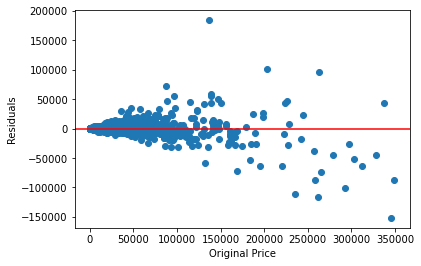

In [2166]:
predicted = rf.fit(X_train_1,y_train).predict(X_test_1)
residuals = predicted - y_test

fig,ax = plt.subplots()
ax.scatter(y_test,residuals)
plt.axhline(y=0, color = 'r')
ax.set_xlabel('Original Price')
ax.set_ylabel('Residuals');

Text(0, 0.5, 'Percent error')

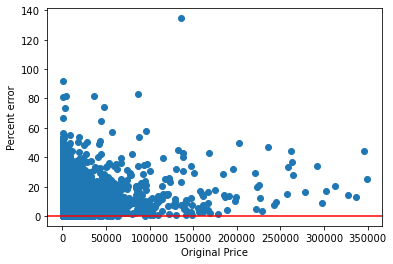

In [2167]:
percent_error = np.abs(y_test - predicted)/y_test*100
fig,ax = plt.subplots()
ax.scatter(y_test,percent_error)
ax.set_xlabel('Original Price')
plt.axhline(y=0, color = 'r')
ax.set_ylabel('Percent error')

In [ ]:
predicted

Looking to see if there are any patterns for ones we over-estimate/under-estimate

In [1795]:
actual_predicted = pd.DataFrame(y_test)
actual_predicted['predicted'] = y_predicted_1
actual_predicted['diff'] = actual_predicted.predicted - actual_predicted.original_price
merge = X_test
merged = merge.merge(actual_predicted, left_index=True, right_index=True, how='inner')
#under predicted
under = merged[merged['diff']<0]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


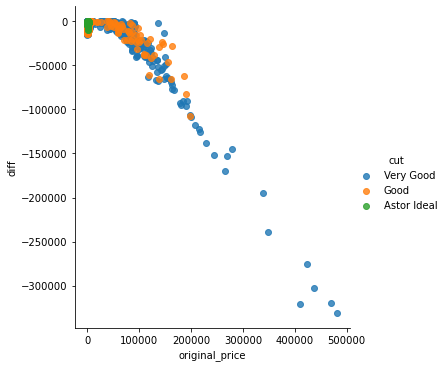

In [1796]:
sns.lmplot('original_price','diff', data=under,hue='cut', fit_reg =False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


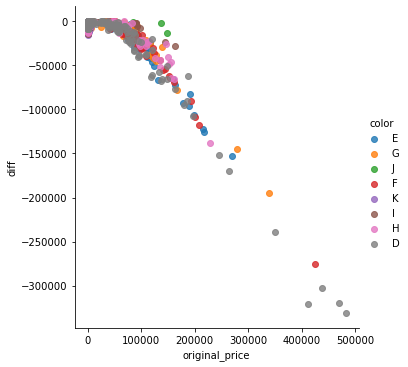

In [1801]:
sns.lmplot('original_price','diff', data=under,hue='color', fit_reg =False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


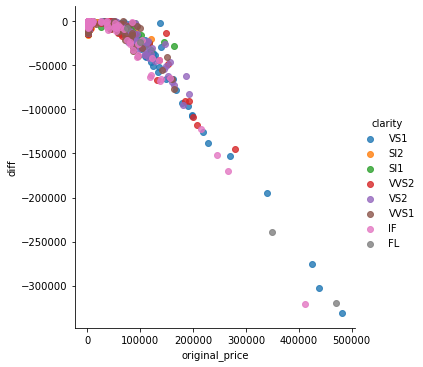

In [1798]:
sns.lmplot('original_price','diff', data=under,hue='clarity', fit_reg =False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


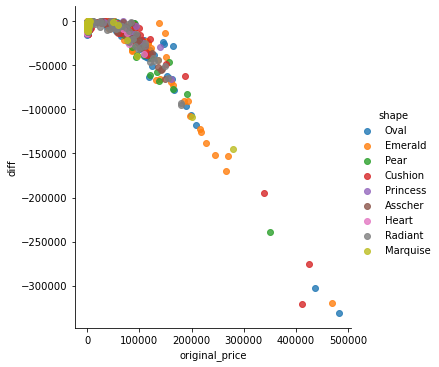

In [1799]:
sns.lmplot('original_price','diff', data=under,hue='shape', fit_reg =False)

In [1802]:
#over predicting
over = merged[merged['diff']>0]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


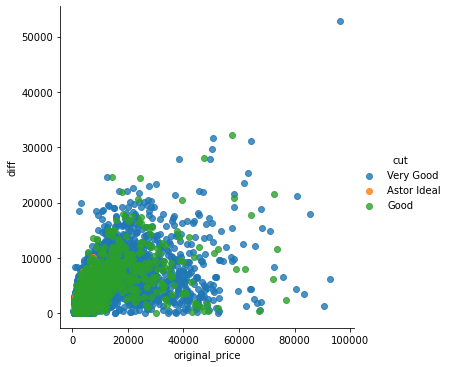

In [1803]:
sns.lmplot('original_price','diff', data=over,hue='cut', fit_reg =False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


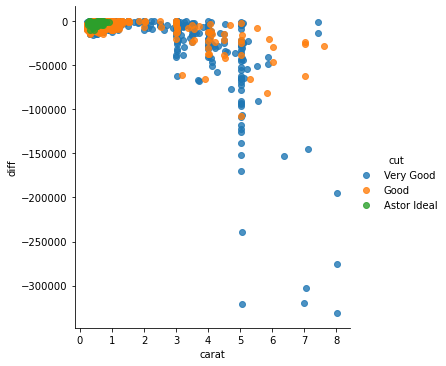

In [1808]:
sns.lmplot('carat','diff', data=under,hue='cut', fit_reg =False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


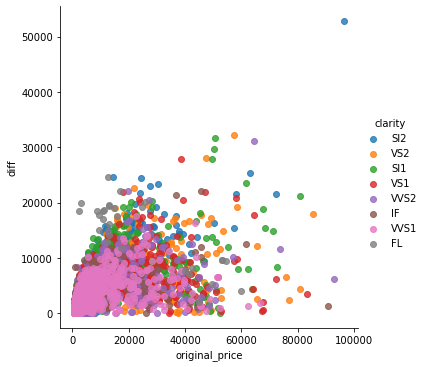

In [1805]:
sns.lmplot('original_price','diff', data=over,hue='clarity', fit_reg =False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


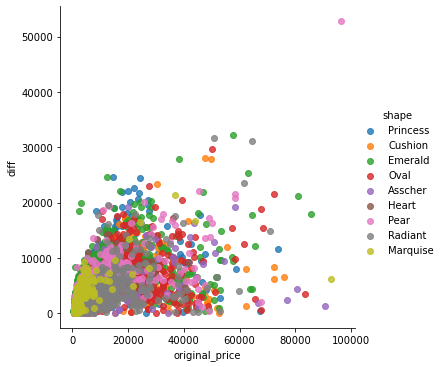

In [1806]:
sns.lmplot('original_price','diff', data=over,hue='shape', fit_reg =False)

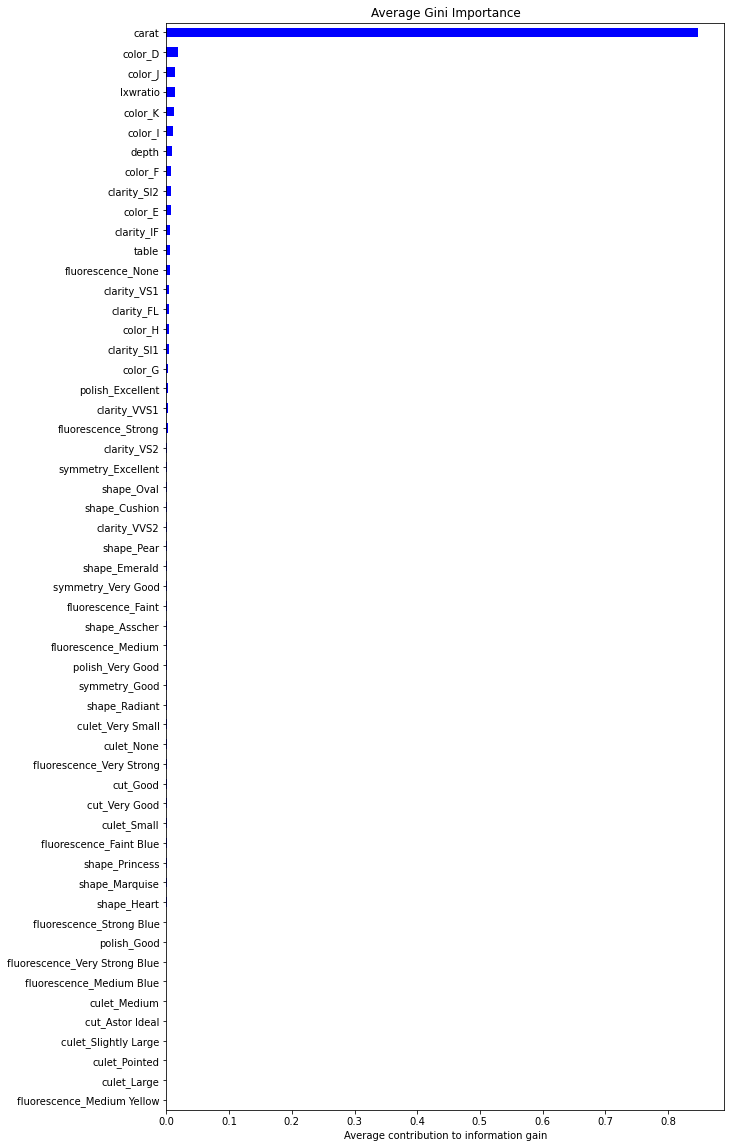

In [1723]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=X_train_1.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,20),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

Looks like it is underfitting but regardless it looks like my model's performance isn't changing much

In [2110]:
#using all features - more trees
rf= RandomForestRegressor(n_jobs=-1, n_estimators=1200).fit(X_train_1,y_train)
print(f'Train RMSE: {-cross_val_score(rf,X_train_1,y_train,scoring="neg_root_mean_squared_error").mean()}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test,rf.predict(X_test_1)))}')
print(f'Train R2: {cross_val_score(rf,X_train_1,y_train,scoring="r2").mean()}')
print(f'Test R2: {r2_score(y_test,rf.predict(X_test_1))}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test,rf.fit(X_train_1,y_train).predict(X_test_1))}')

Train RMSE: 4033.661642141934
Test RMSE: 4528.639585180554
Train R2: 0.9524356791072226
Test R2: 0.94191076614943
Mean Absolute Percentage Error: 0.07923988150079847


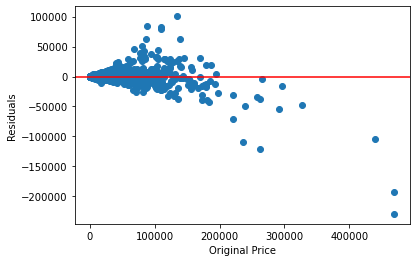

In [2111]:
predicted = rf.fit(X_train_1,y_train).predict(X_test_1)
residuals = predicted - y_test

fig,ax = plt.subplots()
ax.scatter(y_test,residuals)
plt.axhline(y=0, color = 'r')
ax.set_xlabel('Original Price')
ax.set_ylabel('Residuals');

Text(0, 0.5, 'Percent error')

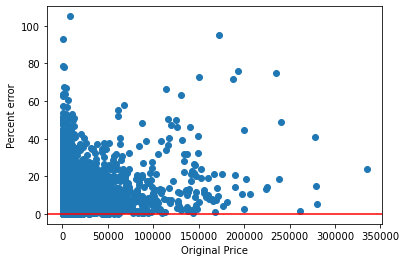

In [2112]:
percent_error = np.abs(y_test - predicted)/y_test*100
fig,ax = plt.subplots()
ax.scatter(predicted,percent_error)
ax.set_xlabel('Original Price')
plt.axhline(y=0, color = 'r')
ax.set_ylabel('Percent error')

In [2118]:
actual_predicted = pd.DataFrame(y_test)
actual_predicted['predicted'] = predicted
actual_predicted['Residual'] = actual_predicted.predicted - actual_predicted.original_price
merge = X_test
merged = merge.merge(actual_predicted, left_index=True, right_index=True, how='inner')
#under predicted
under = merged[merged['Residual']<0]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


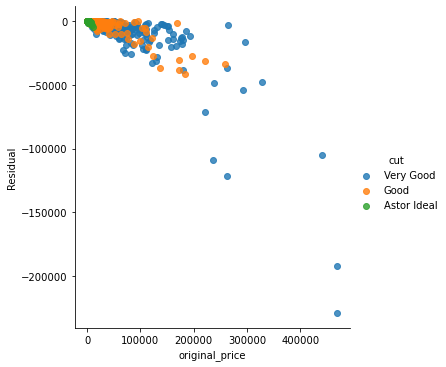

In [2119]:
sns.lmplot('original_price','Residual', data=under,hue='cut', fit_reg =False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


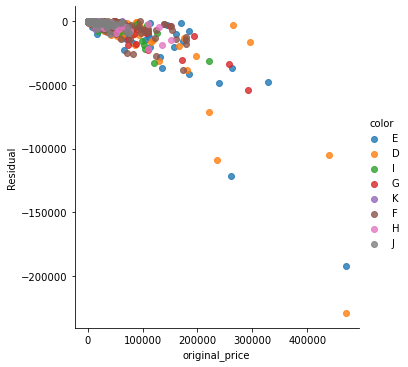

In [2120]:
sns.lmplot('original_price','Residual', data=under,hue='color', fit_reg =False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


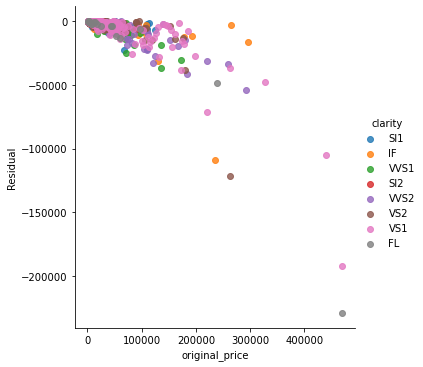

In [2121]:
sns.lmplot('original_price','Residual', data=under,hue='clarity', fit_reg =False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


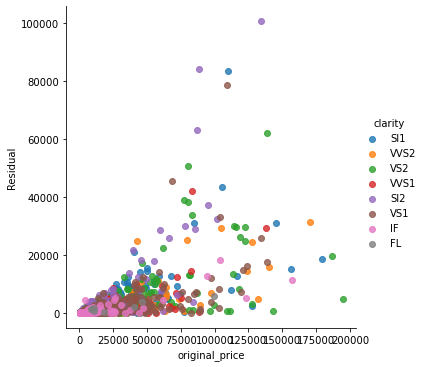

In [2123]:
sns.lmplot('original_price','Residual', data=over,hue='clarity', fit_reg =False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


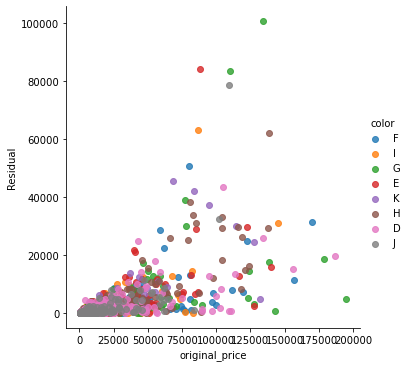

In [2124]:
sns.lmplot('original_price','Residual', data=over,hue='color', fit_reg =False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


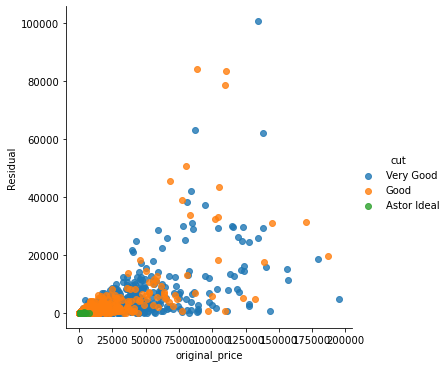

In [2125]:
sns.lmplot('original_price','Residual', data=over,hue='cut', fit_reg =False)

In [2122]:
actual_predicted = pd.DataFrame(y_test)
actual_predicted['predicted'] = predicted
actual_predicted['Residual'] = actual_predicted.predicted - actual_predicted.original_price
merge = X_test
merged = merge.merge(actual_predicted, left_index=True, right_index=True, how='inner')
#over predicted
over = merged[merged['Residual']>0]

In [1710]:
#remove features/only using 4c's - improved but underfitting
rf= RandomForestRegressor(n_jobs=-1).fit(X_train_2,y_train)
print(f'Train RMSE: {-cross_val_score(rf,X_train_2,y_train, scoring="neg_root_mean_squared_error").mean()}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test,rf.predict(X_test_2)))}')

Train RMSE: 4664.228872961501
Test RMSE: 4298.63295021853


* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [1063]:
#creating a random grid
n_estimators = [int(x) for x in np.linspace(start=200,stop=500, num =4)]
max_features = ['auto','sqrt']
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]

random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [2063]:
#using 4Cs
rf= RandomForestRegressor(n_jobs=-1).fit(X_train_2,y_train)
print(f'Train RMSE: {-cross_val_score(rf,X_train_2,y_train,scoring="neg_root_mean_squared_error").mean()}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test,rf.predict(X_test_2)))}')
print(f'Train R2: {cross_val_score(rf,X_train_2,y_train,scoring="r2").mean()}')
print(f'Test R2: {r2_score(y_test,rf.predict(X_test_2))}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test,rf.fit(X_train_2,y_train).predict(X_test_2))}')


Train RMSE: 4326.343055695449
Test RMSE: 4646.723360816676
Train R2: 0.9435050487669654
Test R2: 0.943883895273468
Mean Absolute Percentage Error: 0.10786858348310108


In [2064]:
#using only carats
rf= RandomForestRegressor(n_jobs=-1).fit(X_train_c,y_train)
print(f'Train RMSE: {-cross_val_score(rf,X_train_c,y_train,scoring="neg_root_mean_squared_error").mean()}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test,rf.predict(X_test_c)))}')
print(f'Train R2: {cross_val_score(rf,X_train_c,y_train,scoring="r2").mean()}')
print(f'Test R2: {r2_score(y_test,rf.predict(X_test_c))}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test,rf.fit(X_train_c,y_train).predict(X_test_c))}')



Train RMSE: 8237.110386078573
Test RMSE: 9512.970809884726
Train R2: 0.7956968399983742
Test R2: 0.7648060155445771
Mean Absolute Percentage Error: 0.24028152083709373


In [2106]:
df_filtered.shape

(52408, 14)